<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Zahra Helalizadeh

**Student ID**: 400102193



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [53]:
## Import necessary libraries here ##
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
import warnings

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [54]:
## Write your code here ##
# Load the Boston dataset
df = pd.read_csv('Q1/Boston.csv')

# Display the shape of the dataset
print("Shape of the dataset:", df.shape)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()


Shape of the dataset: (506, 14)
First few rows of the dataset:


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


The Boston dataset is a classic dataset used in machine learning for regression tasks. It contains information collected by the U.S Census Service concerning housing in the area of Boston, Massachusetts. Here's an explanation of its features and the dataset's shape:

### Features:
1. **CRIM:** Per capita crime rate by town.
2. **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS:** Proportion of non-retail business acres per town.
4. **CHAS:** Charles River dummy variable (1 if tract bounds river; 0 otherwise).
5. **NX:** Nitric oxides concentration (parts per 10 million).
6. **RM:** Average number of rooms per dwelling.
7. **AGE:** Proportion of owner-occupied units built prior to 1940.
8. **DIS:** Weighted distances to five Boston employment centers.
9. **RAD:** Index of accessibility to radial highways.
10. **TAX:** Full-value property tax rate per $10,000.
11. **PTRATIO:** Pupil-teacher ratio by town.
12. **B:** 1000(Bk - 0.63)^2 where Bk is the proportion of people of African American descent by town.
13. **LSTAT:** Percentage lower status of the population.
14. **MEDV:** Median value of owner-occupied homes in $1000s (the target variable).

### Dataset's Shape:
- The dataset contains 506 rows and 14 columns.
- This means there are 506 instances (samples) and 14 features (attributes) in the dataset.
- Each row represents a different town in Boston, and each column represents a specific attribute or feature related to that town's housing characteristics.

**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [55]:
## Write your code here ##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Separate target variable (y) from features (X)
y = df['MEDV']
df_X = df.copy()
X = df_X.drop(columns=['MEDV'])

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Predict target variable for train and test sets
y_train_pred = linear_regression_model.predict(X_train)
y_test_pred = linear_regression_model.predict(X_test)

# Calculate RMSE for train and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate R^2 for train and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Get intercept and coefficients
intercept = linear_regression_model.intercept_
coefs = linear_regression_model.coef_

# Display results
print("R^2 for train set:", r2_train)
print("R^2 for test set:", r2_test)
print("RMSE for train set:", rmse_train)
print("RMSE for test set:", rmse_test)
print("Intercept:", intercept)
print("Coefficients:")
for feature, coef in zip(X.columns, coefs):
    print(f"{feature}: {coef}")

R^2 for train set: 0.7508856358979673
R^2 for test set: 0.6687594935356295
RMSE for train set: 4.6520331848801675
RMSE for test set: 4.928602182665355
Intercept: 30.246750993923705
Coefficients:
CRIM: -0.11305592398537832
ZN: 0.030110464145646023
INDUS: 0.04038072041333649
CHAS: 2.7844382035079183
NX: -17.20263339178114
RM: 4.438835199513049
AGE: -0.006296362210984044
DIS: -1.4478653685307892
RAD: 0.2624297355850866
TAX: -0.010646786275308184
PTRATIO: -0.9154562404680755
B: 0.012351334729969474
LSTAT: -0.5085714244487942


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

In [56]:
## Write your code here ##
# Set alphas parameter for ridge regression
alphas = 10 ** np.linspace(3, -3, 100) * 0.5


 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

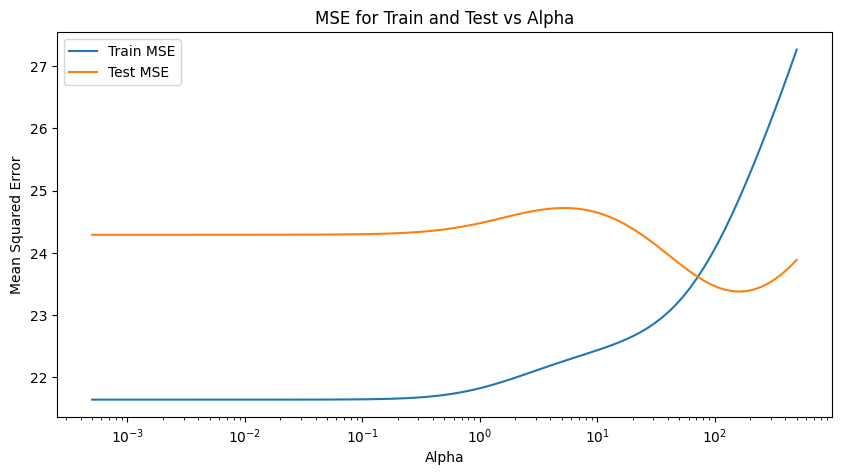

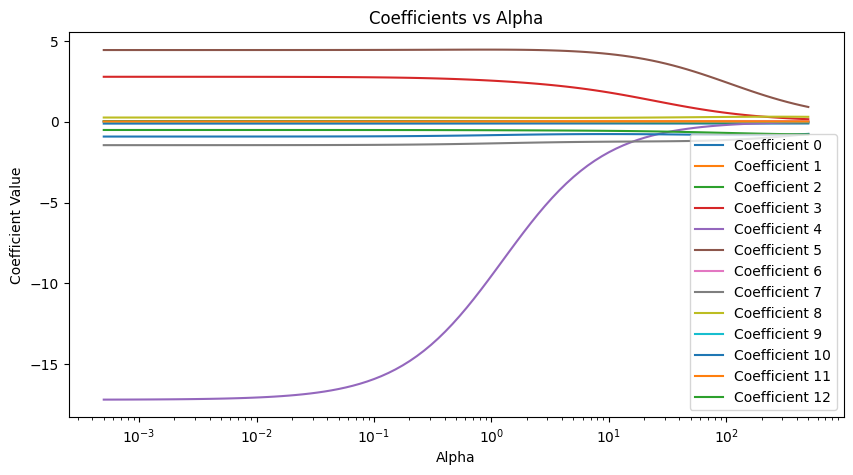

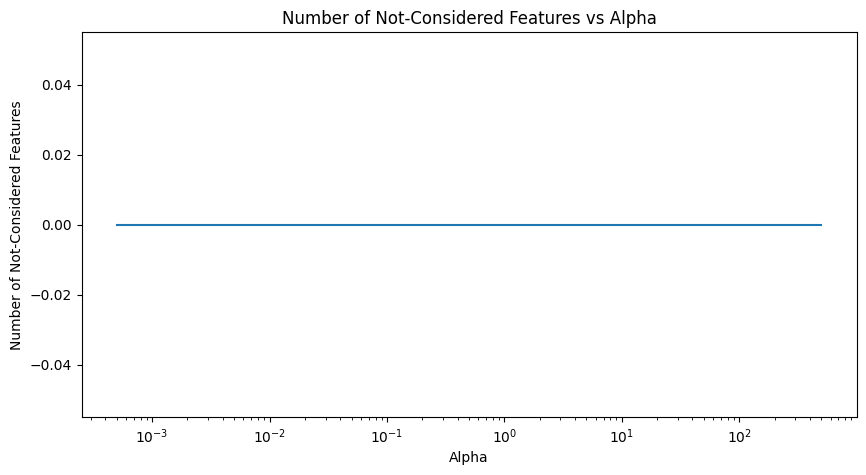

Optimal Alpha: 163.72745814388642
MSE: 23.378168171507397
R^2 Score: 0.681208753128175
Coefficients: [-0.11058924  0.03996102 -0.0520014   0.38073404 -0.115418    1.89720331
  0.00709776 -1.05241569  0.3094509  -0.01494741 -0.82272188  0.01159841
 -0.72589539]


In [57]:
## Write your code here ##
train_mse = []
test_mse = []
coefficients = []
not_considered_features = []

# Ridge regression for each alpha
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        ridge.fit(X_train, y_train)
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    coefficients.append(ridge.coef_)
    not_considered_features.append(np.sum(ridge.coef_ == 0))

# Plot MSE for train and test versus α
plt.figure(figsize=(10, 5))
plt.plot(alphas, train_mse, label='Train MSE')
plt.plot(alphas, test_mse, label='Test MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Train and Test vs Alpha')
plt.legend()
plt.show()

# Plot coefficients versus α
coefficients = np.array(coefficients)
plt.figure(figsize=(10, 5))
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i], label='Coefficient {}'.format(i))
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs Alpha')
plt.legend()
plt.show()

# Plot number of not-considered features versus α
plt.figure(figsize=(10, 5))
plt.plot(alphas, not_considered_features)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features vs Alpha')
plt.show()

# Select the optimal value of α
optimal_alpha_idx = np.argmin(test_mse)
optimal_alpha = alphas[optimal_alpha_idx]

# Ridge regression with optimal alpha
ridge_optimal = Ridge(alpha=optimal_alpha)
ridge_optimal.fit(X_train, y_train)
y_pred = ridge_optimal.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Optimal Alpha:", optimal_alpha)
print("MSE:", mse)
print("R^2 Score:", r2)
print("Coefficients:", ridge_optimal.coef_)


**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

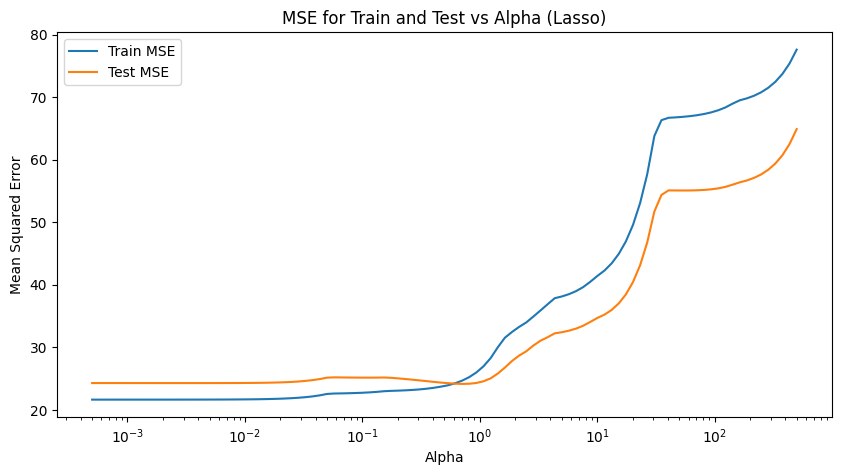

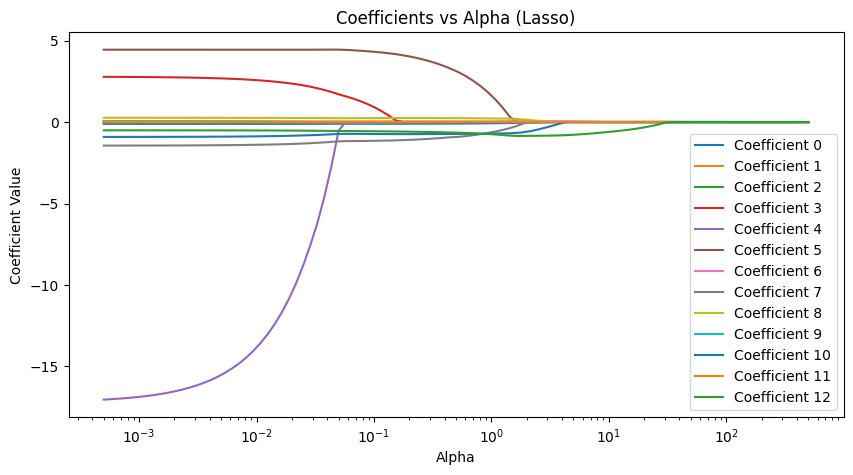

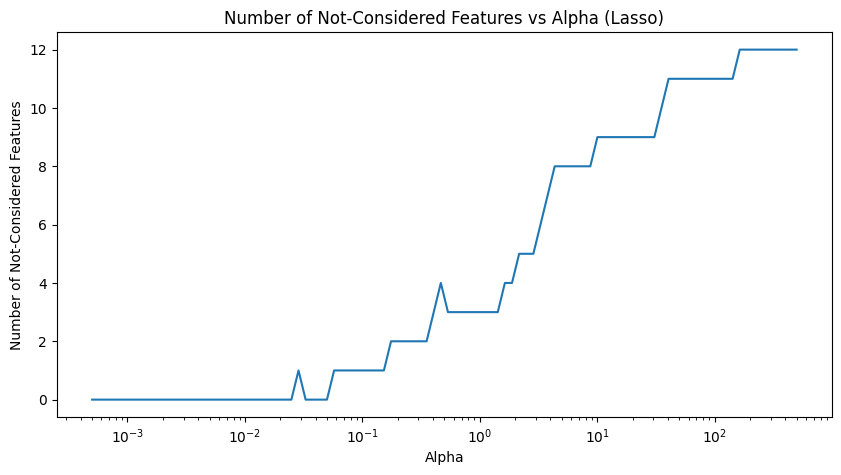

Optimal Alpha (Lasso): 0.7087370814634024
MSE (Lasso): 24.153219243073355
R^2 Score (Lasso): 0.6706399397086964
Coefficients (Lasso): [-0.08616746  0.0308067  -0.          0.         -0.          2.50824373
  0.00611413 -0.801558    0.22931102 -0.01270717 -0.72057187  0.01186642
 -0.68953564]


In [58]:
## Write your code here ##
train_mse_lasso = []
test_mse_lasso = []
coefficients_lasso = []
not_considered_features_lasso = []

# Lasso regression for each alpha
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        lasso.fit(X_train, y_train)
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    train_mse_lasso.append(mean_squared_error(y_train, y_train_pred))
    test_mse_lasso.append(mean_squared_error(y_test, y_test_pred))
    coefficients_lasso.append(lasso.coef_)
    not_considered_features_lasso.append(np.sum(lasso.coef_ == 0))

# Plot MSE for train and test versus α
plt.figure(figsize=(10, 5))
plt.plot(alphas, train_mse_lasso, label='Train MSE')
plt.plot(alphas, test_mse_lasso, label='Test MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Train and Test vs Alpha (Lasso)')
plt.legend()
plt.show()

# Plot coefficients versus α
coefficients_lasso = np.array(coefficients_lasso)
plt.figure(figsize=(10, 5))
for i in range(coefficients_lasso.shape[1]):
    plt.plot(alphas, coefficients_lasso[:, i], label='Coefficient {}'.format(i))
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs Alpha (Lasso)')
plt.legend()
plt.show()

# Plot number of not-considered features versus α
plt.figure(figsize=(10, 5))
plt.plot(alphas, not_considered_features_lasso)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features vs Alpha (Lasso)')
plt.show()

# Select the optimal value of α for Lasso
optimal_alpha_idx_lasso = np.argmin(test_mse_lasso)
optimal_alpha_lasso = alphas[optimal_alpha_idx_lasso]

# Lasso regression with optimal alpha
lasso_optimal = Lasso(alpha=optimal_alpha_lasso)
lasso_optimal.fit(X_train, y_train)
y_pred_lasso = lasso_optimal.predict(X_test)

# Calculate metrics for Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Optimal Alpha (Lasso):", optimal_alpha_lasso)
print("MSE (Lasso):", mse_lasso)
print("R^2 Score (Lasso):", r2_lasso)
print("Coefficients (Lasso):", lasso_optimal.coef_)

Lasso regression, also known as L1 regularization, is particularly useful in situations where feature selection is important or when dealing with high-dimensional datasets with many irrelevant features. Here are some scenarios where Lasso regression might be considered:

1. **Feature Selection:** When you have a large number of features and you suspect that only a subset of them are truly relevant for prediction, Lasso regression can help by driving the coefficients of irrelevant features to zero. This effectively performs automatic feature selection and leads to a simpler and more interpretable model.

2. **High-Dimensional Datasets:** In datasets where the number of features is much larger than the number of samples, known as the "curse of dimensionality," Lasso regression can help mitigate overfitting by effectively reducing the number of features used in the model. This is especially important in fields like genomics, text mining, and image processing.

3. **Interpretability:** Lasso regression tends to produce sparse models with fewer non-zero coefficients compared to Ridge regression. Sparse models are easier to interpret and understand, making Lasso regression a preferred choice when model interpretability is important.

4. **Dealing with Collinearity:** When there are strong correlations between predictors (multicollinearity), Lasso regression tends to select one feature from a group of correlated features while setting the coefficients of the others to zero. This can help in reducing redundancy and improving the stability of the model.

5. **Prediction with Fewer Features:** In scenarios where computational efficiency or model simplicity is crucial, Lasso regression can be used to build predictive models with fewer features, leading to faster training times and potentially improved generalization performance.

Overall, Lasso regression is a powerful tool in the machine learning toolbox, especially when feature selection, interpretability, or dealing with high-dimensional datasets are important considerations.

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

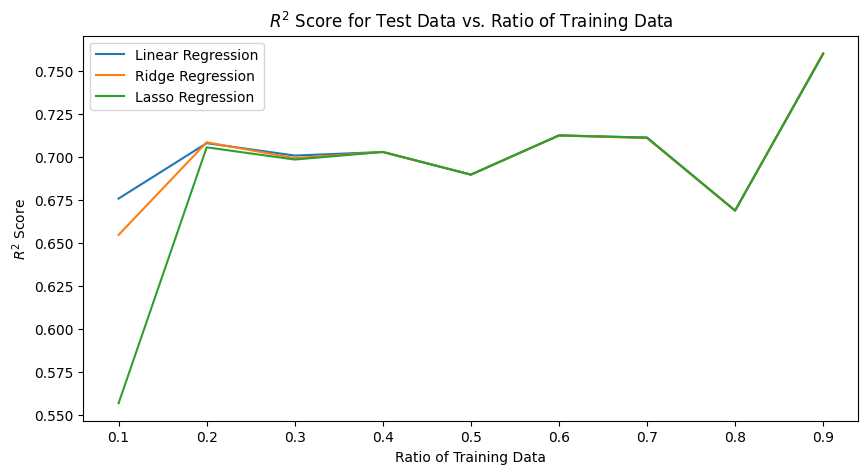

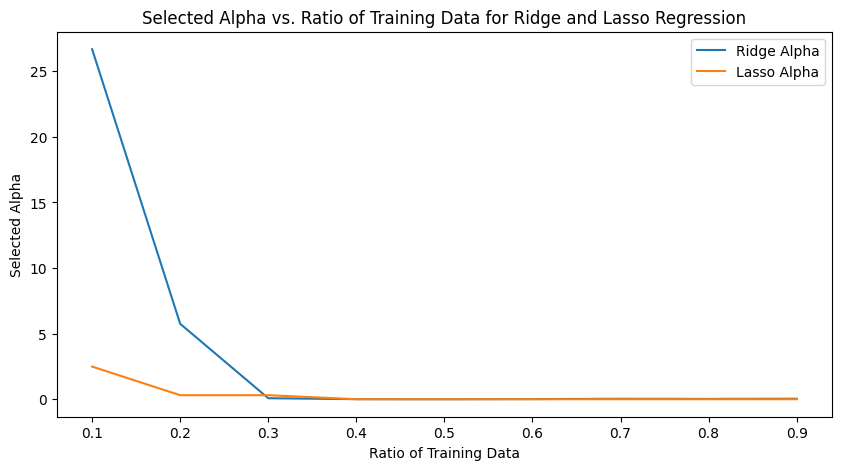

In [59]:
## Write you code here ##
# Define a range of training data ratios
training_data_ratios = np.linspace(0.1, 0.9, 9)

# Lists to store results
r2_scores_lr = []
r2_scores_ridge = []
r2_scores_lasso = []
selected_alphas_ridge = []
selected_alphas_lasso = []

for ratio in training_data_ratios:
    # Split data based on the ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - ratio, random_state=42)

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    r2_scores_lr.append(r2_score(y_test, lr.predict(X_test)))

    # Ridge Regression
    ridge = RidgeCV(alphas=alphas)
    ridge.fit(X_train, y_train)
    r2_scores_ridge.append(ridge.score(X_test, y_test))
    selected_alphas_ridge.append(ridge.alpha_)

    # Lasso Regression
    lasso = LassoCV(alphas=alphas)
    lasso.fit(X_train, y_train)
    r2_scores_lasso.append(lasso.score(X_test, y_test))
    selected_alphas_lasso.append(lasso.alpha_)

# Plot R^2 scores for test data versus ratio of training data
plt.figure(figsize=(10, 5))
plt.plot(training_data_ratios, r2_scores_lr, label='Linear Regression')
plt.plot(training_data_ratios, r2_scores_ridge, label='Ridge Regression')
plt.plot(training_data_ratios, r2_scores_lasso, label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('$R^2$ Score')
plt.title('$R^2$ Score for Test Data vs. Ratio of Training Data')
plt.legend()
plt.show()

# Plot selected α value versus training data ratio for Ridge and Lasso regression methods
plt.figure(figsize=(10, 5))
plt.plot(training_data_ratios, selected_alphas_ridge, label='Ridge Alpha')
plt.plot(training_data_ratios, selected_alphas_lasso, label='Lasso Alpha')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Selected Alpha')
plt.title('Selected Alpha vs. Ratio of Training Data for Ridge and Lasso Regression')
plt.legend()
plt.show()

The first plot shows the $R^2$ score for test data versus the ratio of training data for linear regression, ridge regression, and lasso regression. As the ratio of training data increases, the $R^2$ score tends to improve for all three methods. However, it's important to note that the rate of improvement may vary, and the $R^2$ score may plateau or even decrease after a certain point, indicating potential overfitting.

The second plot shows the selected alpha value versus the ratio of training data for ridge and lasso regression methods. As the ratio of training data increases, the selected alpha tends to decrease for both ridge and lasso regression. This behavior is expected because with more training data, regularization becomes less necessary, leading to smaller penalty terms (alpha values) being selected.

Overall, these plots illustrate the behavior of linear regression, ridge regression, and lasso regression in preventing overfitting as the amount of training data varies. They also demonstrate how the regularization strength (alpha) adapts with different amounts of training data for ridge and lasso regression methods.